In [ ]:
it from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import os
os.chdir('/content/drive/My Drive/ML')
!ls

# **Libraries**

In [ ]:
# To work with data
import pandas as pd
from collections import Counter

# To do linear algebra
import numpy as np
from numpy import pi

# To draw plots
import matplotlib.pyplot as plt
import seaborn as sns

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# **1.	Data Preprocessing**

In [ ]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Combine both dataframes into one
train['Data'] = 'Train'
test['Data'] = 'Test'
both_df = pd.concat([train, test], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

# Create label
label = both_df.pop('Activity')

print('Shape Train:\t{}'.format(train.shape))
print('Shape Test:\t{}\n'.format(test.shape))

train.head()

Shape Train:	(7352, 564)
Shape Test:	(2947, 564)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [ ]:
# Group, count and sort main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

# Mainly there are 'acceleration' and 'gyroscope' features

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [ ]:
# Check dublicated values
print("Number of Duplicates = " + str(both_df.duplicated().sum()))

# Check null values and print dataframe information
print('Number of Null Values In DataFrame: {}\n'.format((both_df.isna().sum()).sum()))

# Print dataframe info
both_df.info()

Number of Duplicates = 0
Number of Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


In [ ]:
# Print a summary of statistical measures
both_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **2. Data Analysis and Feature Engineering**

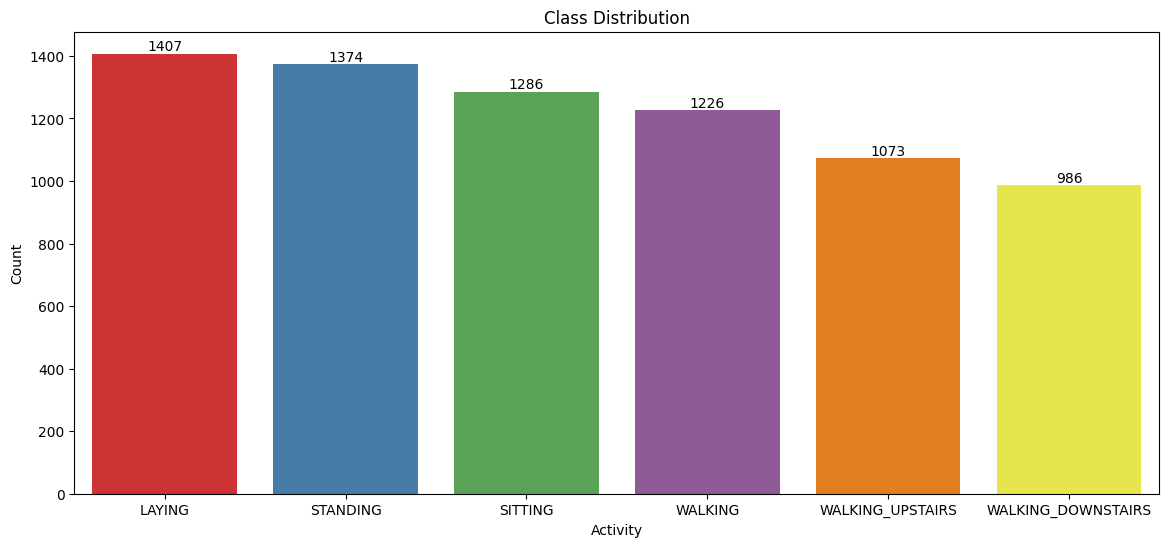

In [ ]:
# Extract "value counts" and indexes from DataFrame
class_counts = train['Activity'].value_counts()
class_labels = class_counts.index

# Plot the class distribution
plt.figure(figsize=(14, 6))


sns.set_palette('Set1')  # Choose a colorful palette
sns.barplot(x=class_labels, y=class_counts)
for i in range(len(class_labels)):    # Show value for each bar
    plt.text(i,class_counts[i],class_counts[i], ha = 'center', va ='bottom')

plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

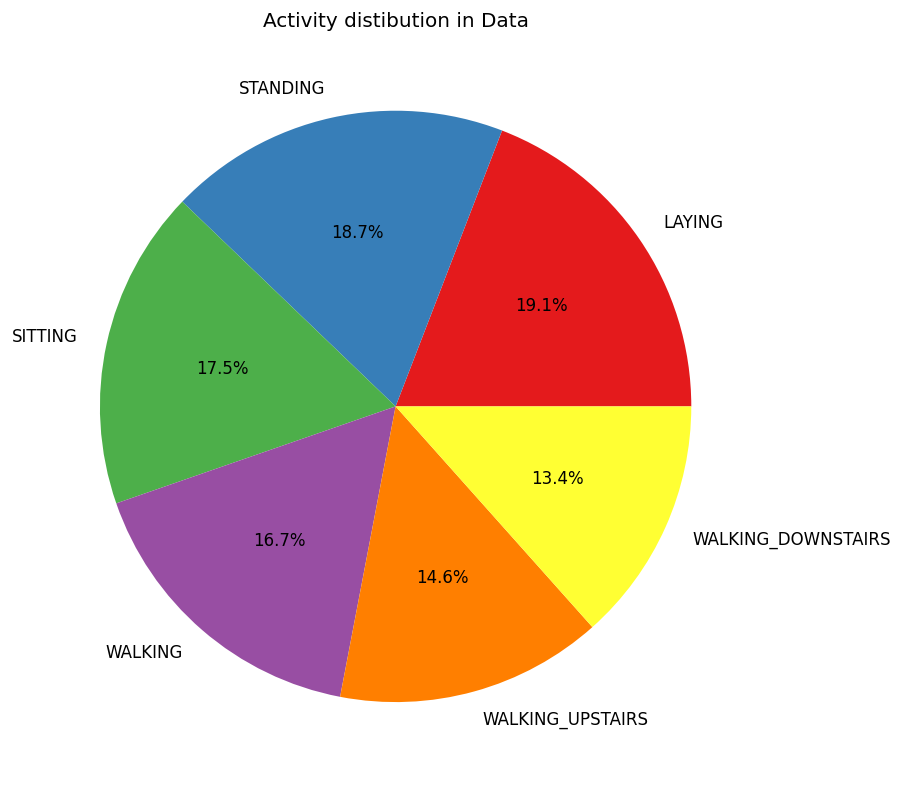

In [ ]:
# Calculate the class counts and labels
class_counts = train['Activity'].value_counts()
class_labels = class_counts.index

# Plotting the pie chart
plt.figure(figsize=(8, 8),dpi=120)

# Create the pie chart
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%')

# Set title
plt.title('Activity distibution in Data')

# Display the pie chart
plt.show()


In [ ]:
data = pd.concat([train, test])
data = data.sample(frac=1)

x = data.drop(['subject', 'Activity', 'Data'], axis=1)
y = data['Activity']

pca = PCA(n_components=0.99)
pca.fit(x)
x_reduced = pca.transform(x)

print('Original number of features {} Reduced number of features {}'.format(x.shape[1], x_reduced.shape[1]))

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

x_reconstructed = pca.inverse_transform(x_reduced)
reconstruction_error = np.mean(np.sum((x - x_reconstructed)**2, axis=1))
print("Reconstruction Error:", reconstruction_error)

Original number of features 561 Reduced number of features 157
Reconstruction Error: 0.5380635359144013


# **3.	Splitting the Dataset**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_reduced_scaled = scaler.fit_transform(x_reduced)

# Split the dataset into training and testing subsets with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, shuffle=True, random_state=42)

# Split the PCA dataset into training and testing subsets with stratified sampling
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_scaled, y, test_size=0.2, shuffle=True, random_state=42)


# Check the class distribution in the training and testing subsets
print("PCA Training Set - Class Distribution:")
print(y_train_pca.value_counts(normalize=True))

print("\nPCA Testing Set - Class Distribution:")
print(y_test_pca.value_counts(normalize=True))

print('\nShape x_train_pca:\t{}'.format(x_train_pca.shape))
print('Shape y_train_pca:\t{}'.format(y_train_pca.shape))
print('Shape x_test_pca:\t{}'.format(x_test_pca.shape))
print('Shape y_test_pca:\t{}'.format(y_test_pca.shape))

PCA Training Set - Class Distribution:
LAYING                0.189101
STANDING              0.182789
SITTING               0.172351
WALKING               0.168346
WALKING_UPSTAIRS      0.150261
WALKING_DOWNSTAIRS    0.137153
Name: Activity, dtype: float64

PCA Testing Set - Class Distribution:
STANDING              0.194175
LAYING                0.187379
SITTING               0.173301
WALKING               0.162621
WALKING_UPSTAIRS      0.148544
WALKING_DOWNSTAIRS    0.133981
Name: Activity, dtype: float64

Shape x_train_pca:	(8239, 157)
Shape y_train_pca:	(8239,)
Shape x_test_pca:	(2060, 157)
Shape y_test_pca:	(2060,)


# **4. Models**

In [ ]:
#Bayes Decision Theory: Multivariate Gaussian
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

#-------------------------------------------------------------------------------
#Logistic Regression
from sklearn.linear_model import LogisticRegression

max_iter = 5000

# Create an instance of LogisticRegression
logreg = LogisticRegression(solver='saga', max_iter=max_iter)

#-------------------------------------------------------------------------------
# Support Vector Machine
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Create an instance of LinearSVC
svc = LinearSVC(multi_class='ovr', max_iter=max_iter, C=0.1)

# Evaluation metrics for each kernel
kernels = ['sigmoid', 'poly', 'rbf']
accuracy_scores = []
precision_scores = []
recall_scores = []

svm = SVC(kernel=kernels, decision_function_shape='ovr', max_iter=max_iter, C=0.1)

#-------------------------------------------------------------------------------
#Non-parametric method: k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier object
Euclidean_knn = KNeighborsClassifier(n_neighbors=3)
manhattan_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# **5. Evaluation**

In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_algorithms(algorithms, x_train, y_train, x_test, y_test):
    eval_metrics = {}
    execution_times = {}

    for algo_name, algo in algorithms.items():
        # Start timing
        start_time = time.time()

        # Fit the model to the training data
        algo.fit(x_train, y_train)

        # Make predictions on the test data
        y_pred = algo.predict(x_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Store evaluation metrics in the dictionary
        eval_metrics[algo_name] = [accuracy, precision, recall]

        # Calculate execution time
        end_time = time.time()
        execution_time = end_time - start_time

        # Store execution time in the dictionary
        execution_times[algo_name] = execution_time

    return eval_metrics, execution_times


In [ ]:
algorithms = {
    'GNB': naive_bayes,
    'Logistic Regression': logreg,
    'LinearSVC': svc,
    'SVC(Sigmoid)': SVC(kernel='sigmoid'),
    'SVC(Poly)': SVC(kernel='poly'),
    'SVC(RBF)': SVC(kernel='rbf'),
    'KNN Euclidean': Euclidean_knn,
    'KNN Manhattan' : manhattan_knn
}

eval_metrics, execution_times = evaluate_algorithms(algorithms, x_train, y_train, x_test, y_test)
pca_eval_metrics, pca_execution_times = evaluate_algorithms(algorithms, x_train_pca, y_train_pca, x_test_pca, y_test_pca)

In [ ]:
# Convert the execution times dictionaries into lists of tuples
algo_names, execution_times = zip(*execution_times.items())
pca_algo_names, pca_execution_times = zip(*pca_execution_times.items())

# **6. Visualization**

In [ ]:
eval_metrics

{'GNB': [0.7300970873786408, 0.7840696219608363, 0.7300970873786408],
 'Logistic Regression': [0.9820388349514563,
  0.9820396735005104,
  0.9820388349514563],
 'LinearSVC': [0.9839805825242719, 0.9840267493097836, 0.9839805825242719],
 'SVC(Sigmoid)': [0.8325242718446602, 0.844932257559779, 0.8325242718446602],
 'SVC(Poly)': [0.970873786407767, 0.9709310195734946, 0.970873786407767],
 'SVC(RBF)': [0.9766990291262136, 0.9766864219193528, 0.9766990291262136],
 'KNN Euclidean': [0.958252427184466, 0.9587111875377845, 0.958252427184466],
 'KNN Manhattan': [0.9733009708737864, 0.9733309042604165, 0.9733009708737864]}

In [ ]:
pca_eval_metrics

{'GNB': [0.8368932038834952, 0.8411629541547283, 0.8368932038834952],
 'Logistic Regression': [0.9825242718446602,
  0.9826104642698481,
  0.9825242718446602],
 'LinearSVC': [0.9830097087378641, 0.983049000364462, 0.9830097087378641],
 'SVC(Sigmoid)': [0.9733009708737864, 0.9733234217255652, 0.9733009708737864],
 'SVC(Poly)': [0.9305825242718446, 0.9458403940864822, 0.9305825242718446],
 'SVC(RBF)': [0.9839805825242719, 0.9842893764329523, 0.9839805825242719],
 'KNN Euclidean': [0.9106796116504854, 0.917707364364451, 0.9106796116504854],
 'KNN Manhattan': [0.9213592233009709, 0.9256788748565655, 0.9213592233009709]}

In [ ]:
# Define the algorithms and their corresponding labels
algorithms = ['GNB', 'Logistic Regression', 'LinearSVC', 'SVC(Sigmoid)', 'SVC(Poly)', 'SVC(RBF)', 'KNN Euclidean', 'KNN manhattan']
metrics = ['Accuracy', 'Precision', 'Recall']

# Iterate over the keys in the dictionaries
for key in eval_metrics.keys():
    # Calculate the differences between the values
    difference = np.subtract(pca_eval_metrics[key], eval_metrics[key])

    # Print the comparison results
    print(f"{key}:")
    for metric, diff in zip(metrics, difference):
        if diff > 0:
            print(f"  {metric}: PCA data is {diff*100:.2f}% higher")
        elif diff < 0:
            print(f"  {metric}: Original data is {-diff*100:.2f}% higher")
        else:
            print(f"  {metric}: No difference")



GNB:
  Accuracy: PCA data is 10.68% higher
  Precision: PCA data is 5.71% higher
  Recall: PCA data is 10.68% higher
Logistic Regression:
  Accuracy: PCA data is 0.05% higher
  Precision: PCA data is 0.06% higher
  Recall: PCA data is 0.05% higher
LinearSVC:
  Accuracy: Original data is 0.10% higher
  Precision: Original data is 0.10% higher
  Recall: Original data is 0.10% higher
SVC(Sigmoid):
  Accuracy: PCA data is 14.08% higher
  Precision: PCA data is 12.84% higher
  Recall: PCA data is 14.08% higher
SVC(Poly):
  Accuracy: Original data is 4.03% higher
  Precision: Original data is 2.51% higher
  Recall: Original data is 4.03% higher
SVC(RBF):
  Accuracy: PCA data is 0.73% higher
  Precision: PCA data is 0.76% higher
  Recall: PCA data is 0.73% higher
KNN Euclidean:
  Accuracy: Original data is 4.76% higher
  Precision: Original data is 4.10% higher
  Recall: Original data is 4.76% higher
KNN Manhattan:
  Accuracy: Original data is 5.19% higher
  Precision: Original data is 4.77% 

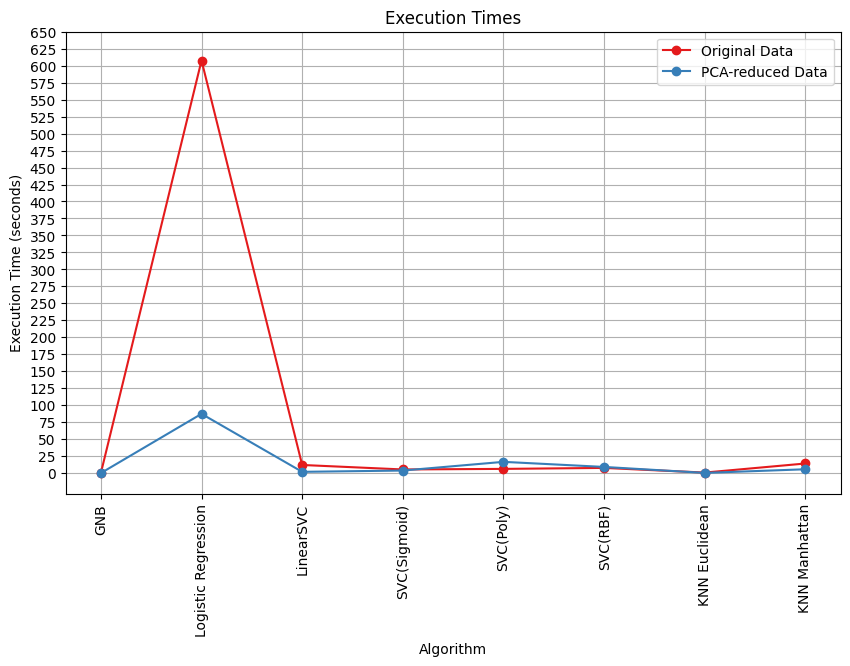

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,6))

# Plot the line for original data
ax.plot(algo_names, execution_times, marker='o', label='Original Data')

# Plot the line for PCA-reduced data
ax.plot(pca_algo_names, pca_execution_times, marker='o', label='PCA-reduced Data')

# Add a grid
ax.grid(True)

# Set labels and title
plt.xlabel('Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set the y-axis range and steps
yticks_range = range(0, int(max(execution_times + pca_execution_times)) + 50, 25)
plt.yticks(yticks_range)

# Add legend
plt.legend()

# Display the plot
plt.show()


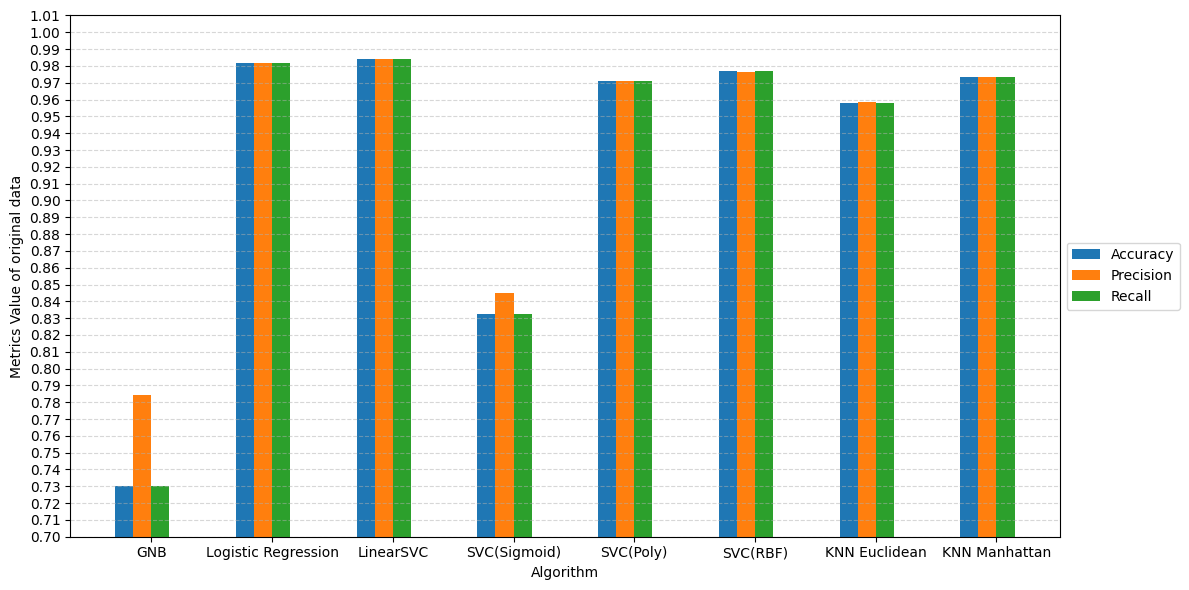

In [ ]:
keys = list(eval_metrics.keys())
values = list(eval_metrics.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(keys))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Define the color palette
colors = sns.color_palette("tab10")

# Plot the bars for each metric
ax.bar(r1, [value[0] for value in values], width=bar_width, color=colors[0], label='Accuracy')
ax.bar(r2, [value[1] for value in values], width=bar_width, color=colors[1], label='Precision')
ax.bar(r3, [value[2] for value in values], width=bar_width, color=colors[2], label='Recall')

# Set x-axis labels and tick positions
ax.set_xticks([r + 1.5 * bar_width for r in range(len(keys))])
ax.set_xticklabels(keys, rotation=0, ha='center')
ax.set_xlabel("Algorithm")

# Set y-axis label
ax.set_ylabel("Metrics Value of original data")

# Set y-axis range and ticks
ax.set_ylim(0.80, 1.00)
ax.set_yticks(np.arange(0.70, 1.01, 0.01))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend on the left side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


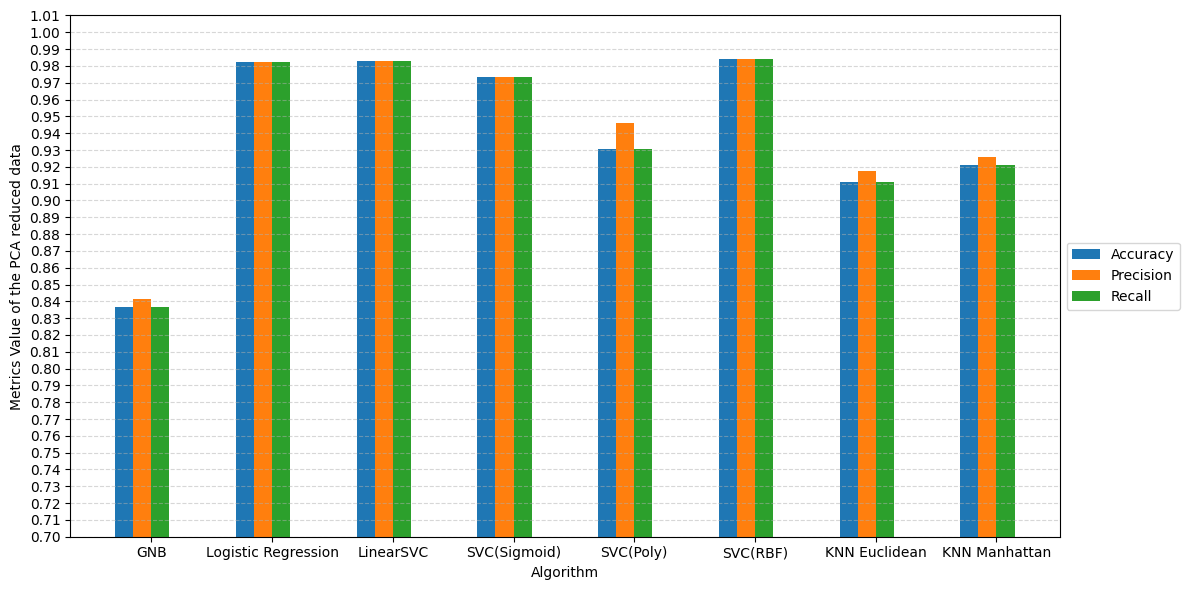

In [ ]:
keys = list(pca_eval_metrics.keys())
values = list(pca_eval_metrics.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(keys))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Define the color palette
colors = sns.color_palette("tab10")

# Plot the bars for each metric
ax.bar(r1, [value[0] for value in values], width=bar_width, color=colors[0], label='Accuracy')
ax.bar(r2, [value[1] for value in values], width=bar_width, color=colors[1], label='Precision')
ax.bar(r3, [value[2] for value in values], width=bar_width, color=colors[2], label='Recall')

# Set x-axis labels and tick positions
ax.set_xticks([r + 1.5 * bar_width for r in range(len(keys))])
ax.set_xticklabels(keys, rotation=0, ha='center')
ax.set_xlabel("Algorithm")

# Set y-axis label
ax.set_ylabel("Metrics Value of the PCA reduced data")

# Set y-axis range and ticks
ax.set_ylim(0.80, 1.00)
ax.set_yticks(np.arange(0.70, 1.01, 0.01))

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add a legend on the left side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
